In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from importlib import reload
import numpy as np
import operator
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 227 # native screen dpi for my computer


In [152]:
files = os.listdir(r'C:\Users\JARVIS\Downloads\Dataset\oyt\stocks')
stocks = {}
for file in files:
    # Include only csv files
    if file.split('.')[1] == 'csv':
        name = file.split('.')[0]
        stocks[name] = pd.read_csv(r'C:\Users\JARVIS\Downloads\Dataset\oyt\stocks/'+file, index_col='Date')
        stocks[name].index = pd.to_datetime(stocks[name].index)

In [153]:
print('List of stocks:', end=' ')
for i in stocks.keys():
    print(i.upper(), end=' ')

List of stocks: AAL AAPL ALGT ALK AMZN BCS BHC CS DAL DB FB GOOG GS HA IBM JNJ LUV MRK MS MSFT PFE RHHBY S&P500 UNH WFC 

# GENERATING MACD,RSI,MA7,MOMENTUM

In [ ]:
#del stocks
files = os.listdir(r'C:\Users\JARVIS\Downloads\Dataset\oyt\stocks')
stocks = {}
for file in files:
    name = file.lower().split('.')[0]
    stocks[name] = pd.read_csv(r'C:\Users\JARVIS\Downloads\Dataset\oyt\stocks/'+file)    
    
    # Return Feature
    stocks[name]['Return'] = round(stocks[name]['Close'] / stocks[name]['Open'] - 1, 3)
    # Change Feature
    # Change of the price from previous day, absolute value
    stocks[name]['Change'] = (stocks[name].Close - stocks[name].Close.shift(1)).fillna(0)
    # Date Feature
    stocks[name]['Date'] = pd.to_datetime(stocks[name]['Date'])
    stocks[name].set_index('Date', inplace=True)
    # Volatility Feature
    stocks[name]['Volatility'] = stocks[name].Close.ewm(21).std()
    # Momentum
    stocks[name]['Momentum'] = momentum(stocks[name].Close, 3)
    # RSI (Relative Strength Index)
    stocks[name]['RSI'] = rsi(stocks[name])
    # MACD - (Moving Average Convergence/Divergence)
    stocks[name]['MACD'], stocks[name]['Signal'] = macd(stocks[name])
    # Upper Band and Lower Band for Bollinger Bands
    stocks[name]['Upper_band'], stocks[name]['Lower_band'] = bollinger_bands(stocks[name])
    stocks[name].dropna(inplace=True)
    # Saving
    stocks[name].to_csv(r'C:\Users\JARVIS\Downloads\Dataset/'+name+'.csv')


In [81]:
# final csv file
stock=pd.read_csv(r'C:\Users\JARVIS\Downloads\Dataset\CSVfiles\cleaned_csv.csv')

In [82]:
stock.head()

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume,Return,Change,Volatility,Momentum,RSI,MACD,Signal,Upper_band,Lower_band
0,29-10-2010,AAL,11.81,11.97,11.47,11.79,11.114922,5499700,-0.002,-0.09,1.089912,8.73,79.213082,0.665686,0.463998,12.338226,8.099869
1,11-01-2010,AAL,11.88,11.88,11.49,11.66,10.992366,4875500,-0.019,-0.13,1.093149,9.00,75.579311,0.663739,0.503946,12.495250,8.168559
2,11-02-2010,AAL,11.75,11.92,11.55,11.92,11.237479,3393600,0.014,0.26,1.109756,8.88,77.775213,0.675390,0.538235,12.659792,8.270685
3,11-03-2010,AAL,11.93,12.12,11.87,12.07,11.378889,5059800,0.012,0.15,1.129276,8.79,78.951155,0.688787,0.568345,12.825142,8.375810
4,11-04-2010,AAL,12.24,12.26,11.55,11.56,10.898091,10437800,-0.056,-0.51,1.108908,8.66,66.137831,0.650750,0.584826,12.880744,8.542113


In [83]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63142 entries, 0 to 63141
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        63142 non-null  object 
 1   Symbol      63142 non-null  object 
 2   Open        63142 non-null  float64
 3   High        63142 non-null  float64
 4   Low         63142 non-null  float64
 5   Close       63142 non-null  float64
 6   Adj Close   63142 non-null  float64
 7   Volume      63142 non-null  int64  
 8   Return      63142 non-null  float64
 9   Change      63142 non-null  float64
 10  Volatility  63142 non-null  float64
 11  Momentum    63142 non-null  float64
 12  RSI         63142 non-null  float64
 13  MACD        63142 non-null  float64
 14  Signal      63142 non-null  float64
 15  Upper_band  63142 non-null  float64
 16  Lower_band  63142 non-null  float64
dtypes: float64(14), int64(1), object(2)
memory usage: 8.2+ MB


In [84]:
d= {'AAL':'Aviation','AAPL':'Technology','ALGT':'Aviation','ALK':'Aviation','AMZN':'Technology' ,'BCS':'Finance','BHC':'Pharma_Healthcare','CS':'Finance','DAL':'Aviation','DB':'Finance','FB':'Technology','GOOG':'Technology','GS':'Finance','HA':'Aviation','IBM':'Technology','JNJ':'Pharma_Healthcare','LUV':'Aviation','MRK':'Pharma_Healthcare','MS':'Finance','MSFT':'Technology','PFE':'Pharma_Healthcare','RHHBY':'Pharma_Healthcare','S&P500':'Index','UNH':'Pharma_Healthcare','WFC':'Finance'}
for k, v in d.items():
    stock.loc[stock['Symbol'].str.contains(k), 'Industry'] = v

In [85]:
## for tableau to build dashboard
stock.head()
stock.to_csv(r'C:\Users\JARVIS\Downloads\Dataset\CSVfiles\cleaned_induscsv.csv')

In [86]:
stock.Industry.value_counts()

Finance              16110
Aviation             14982
Pharma_Healthcare    14982
Technology           12485
Index                 2497
Name: Industry, dtype: int64

## To find Monthly returns 
Create a groupby objects 

In [87]:
ind = stock

In [88]:
gr1 = ind.groupby(['Symbol'])

In [89]:
#For Monthly return we want all monthly date . We can extract using data frame

In [90]:
ind['Date']=pd.to_datetime(ind['Date'])
ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63142 entries, 0 to 63141
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        63142 non-null  datetime64[ns]
 1   Symbol      63142 non-null  object        
 2   Open        63142 non-null  float64       
 3   High        63142 non-null  float64       
 4   Low         63142 non-null  float64       
 5   Close       63142 non-null  float64       
 6   Adj Close   63142 non-null  float64       
 7   Volume      63142 non-null  int64         
 8   Return      63142 non-null  float64       
 9   Change      63142 non-null  float64       
 10  Volatility  63142 non-null  float64       
 11  Momentum    63142 non-null  float64       
 12  RSI         63142 non-null  float64       
 13  MACD        63142 non-null  float64       
 14  Signal      63142 non-null  float64       
 15  Upper_band  63142 non-null  float64       
 16  Lower_band  63142 non-

In [91]:
ind['mdate']=ind['Date'].dt.to_period('M')

In [92]:
ind.head()

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume,Return,Change,Volatility,Momentum,RSI,MACD,Signal,Upper_band,Lower_band,Industry,mdate
0,2010-10-29,AAL,11.81,11.97,11.47,11.79,11.114922,5499700,-0.002,-0.09,1.089912,8.73,79.213082,0.665686,0.463998,12.338226,8.099869,Aviation,2010-10
1,2010-11-01,AAL,11.88,11.88,11.49,11.66,10.992366,4875500,-0.019,-0.13,1.093149,9.00,75.579311,0.663739,0.503946,12.495250,8.168559,Aviation,2010-11
2,2010-11-02,AAL,11.75,11.92,11.55,11.92,11.237479,3393600,0.014,0.26,1.109756,8.88,77.775213,0.675390,0.538235,12.659792,8.270685,Aviation,2010-11
3,2010-11-03,AAL,11.93,12.12,11.87,12.07,11.378889,5059800,0.012,0.15,1.129276,8.79,78.951155,0.688787,0.568345,12.825142,8.375810,Aviation,2010-11
4,2010-11-04,AAL,12.24,12.26,11.55,11.56,10.898091,10437800,-0.056,-0.51,1.108908,8.66,66.137831,0.650750,0.584826,12.880744,8.542113,Aviation,2010-11


In [93]:
ind['ydate']=ind['Date'].dt.to_period('Y')

In [94]:
ind['return_1']=ind['Return']+1

In [95]:
ind.head()

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume,Return,Change,...,Momentum,RSI,MACD,Signal,Upper_band,Lower_band,Industry,mdate,ydate,return_1
0,2010-10-29,AAL,11.81,11.97,11.47,11.79,11.114922,5499700,-0.002,-0.09,...,8.73,79.213082,0.665686,0.463998,12.338226,8.099869,Aviation,2010-10,2010,0.998
1,2010-11-01,AAL,11.88,11.88,11.49,11.66,10.992366,4875500,-0.019,-0.13,...,9.00,75.579311,0.663739,0.503946,12.495250,8.168559,Aviation,2010-11,2010,0.981
2,2010-11-02,AAL,11.75,11.92,11.55,11.92,11.237479,3393600,0.014,0.26,...,8.88,77.775213,0.675390,0.538235,12.659792,8.270685,Aviation,2010-11,2010,1.014
3,2010-11-03,AAL,11.93,12.12,11.87,12.07,11.378889,5059800,0.012,0.15,...,8.79,78.951155,0.688787,0.568345,12.825142,8.375810,Aviation,2010-11,2010,1.012
4,2010-11-04,AAL,12.24,12.26,11.55,11.56,10.898091,10437800,-0.056,-0.51,...,8.66,66.137831,0.650750,0.584826,12.880744,8.542113,Aviation,2010-11,2010,0.944


In [96]:
gr4 = ind.groupby(['Symbol','ydate'])

In [97]:
gr2 = ind.groupby(['Symbol','mdate'])

In [98]:

ind['mret'] = gr2['return_1'].transform(np.product) - 1

In [99]:
ind.Symbol.head()

0    AAL
1    AAL
2    AAL
3    AAL
4    AAL
Name: Symbol, dtype: object

In [100]:
ind.tail()

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume,Return,Change,...,RSI,MACD,Signal,Upper_band,Lower_band,Industry,mdate,ydate,return_1,mret
63137,2020-09-24,WFC,22.959999,23.719999,22.559999,23.320000,23.320000,43329100,0.016,0.490000,...,41.130285,-0.252066,-0.117969,25.649455,23.008640,Finance,2020-09,2020,1.016,-0.006987
63138,2020-09-25,WFC,23.120001,23.709999,23.010000,23.639999,23.639999,30229900,0.022,0.319999,...,44.159300,-0.270026,-0.148380,25.659148,22.960852,Finance,2020-09,2020,1.022,-0.006987
63139,2020-09-28,WFC,23.990000,24.270000,23.760000,23.820000,23.820000,41103500,-0.007,0.180001,...,45.847180,-0.266662,-0.172036,25.632338,22.914329,Finance,2020-09,2020,0.993,-0.006987
63140,2020-09-29,WFC,23.719999,23.719999,23.070000,23.260000,23.260000,38416300,-0.019,-0.560000,...,41.631122,-0.305659,-0.198761,25.618767,22.791709,Finance,2020-09,2020,0.981,-0.006987
63141,2020-09-30,WFC,23.360001,23.870001,23.250000,23.510000,23.510000,43058500,0.006,0.250000,...,44.102412,-0.312786,-0.221566,25.620522,22.729001,Finance,2020-09,2020,1.006,-0.006987


## Remove Duplicates for firms at monthly frequency

In [101]:
indm = ind.drop_duplicates(subset = ['Symbol','mdate'],keep='last' )

In [102]:
indm.tail()

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume,Return,Change,...,RSI,MACD,Signal,Upper_band,Lower_band,Industry,mdate,ydate,return_1,mret
63055,2020-05-29,WFC,26.500000,27.070000,26.09,26.469999,26.361515,51382800,-0.001,-0.750000,...,50.444879,-0.467508,-0.978817,28.858339,22.166423,Finance,2020-05,2020,0.999,-0.152132
63077,2020-06-30,WFC,25.209999,25.870001,25.17,25.600000,25.495083,46610000,0.015,-0.100001,...,42.776762,-0.460064,-0.086392,32.614173,23.822017,Finance,2020-06,2020,1.015,-0.115540
63099,2020-07-31,WFC,24.500000,24.660000,24.08,24.260000,24.160574,45570800,-0.010,-0.390000,...,40.767529,-0.342183,-0.331889,26.674425,23.813194,Finance,2020-07,2020,0.990,-0.008630
63120,2020-08-31,WFC,24.490000,24.510000,24.09,24.150000,24.150000,27615500,-0.014,-0.540001,...,44.949048,-0.266638,-0.313719,25.460753,23.519248,Finance,2020-08,2020,0.986,-0.007020
63141,2020-09-30,WFC,23.360001,23.870001,23.25,23.510000,23.510000,43058500,0.006,0.250000,...,44.102412,-0.312786,-0.221566,25.620522,22.729001,Finance,2020-09,2020,1.006,-0.006987


## Reduct the data to Industry level

In [103]:
gr3 = indm.groupby(['Industry','mdate'])

In [104]:
indm['indmret'] = gr3['mret'].transform(np.mean)

In [105]:
indm.tail()

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume,Return,Change,...,MACD,Signal,Upper_band,Lower_band,Industry,mdate,ydate,return_1,mret,indmret
63055,2020-05-29,WFC,26.500000,27.070000,26.09,26.469999,26.361515,51382800,-0.001,-0.750000,...,-0.467508,-0.978817,28.858339,22.166423,Finance,2020-05,2020,0.999,-0.152132,-0.038140
63077,2020-06-30,WFC,25.209999,25.870001,25.17,25.600000,25.495083,46610000,0.015,-0.100001,...,-0.460064,-0.086392,32.614173,23.822017,Finance,2020-06,2020,1.015,-0.115540,-0.066675
63099,2020-07-31,WFC,24.500000,24.660000,24.08,24.260000,24.160574,45570800,-0.010,-0.390000,...,-0.342183,-0.331889,26.674425,23.813194,Finance,2020-07,2020,0.990,-0.008630,-0.029060
63120,2020-08-31,WFC,24.490000,24.510000,24.09,24.150000,24.150000,27615500,-0.014,-0.540001,...,-0.266638,-0.313719,25.460753,23.519248,Finance,2020-08,2020,0.986,-0.007020,0.012373
63141,2020-09-30,WFC,23.360001,23.870001,23.25,23.510000,23.510000,43058500,0.006,0.250000,...,-0.312786,-0.221566,25.620522,22.729001,Finance,2020-09,2020,1.006,-0.006987,-0.063176


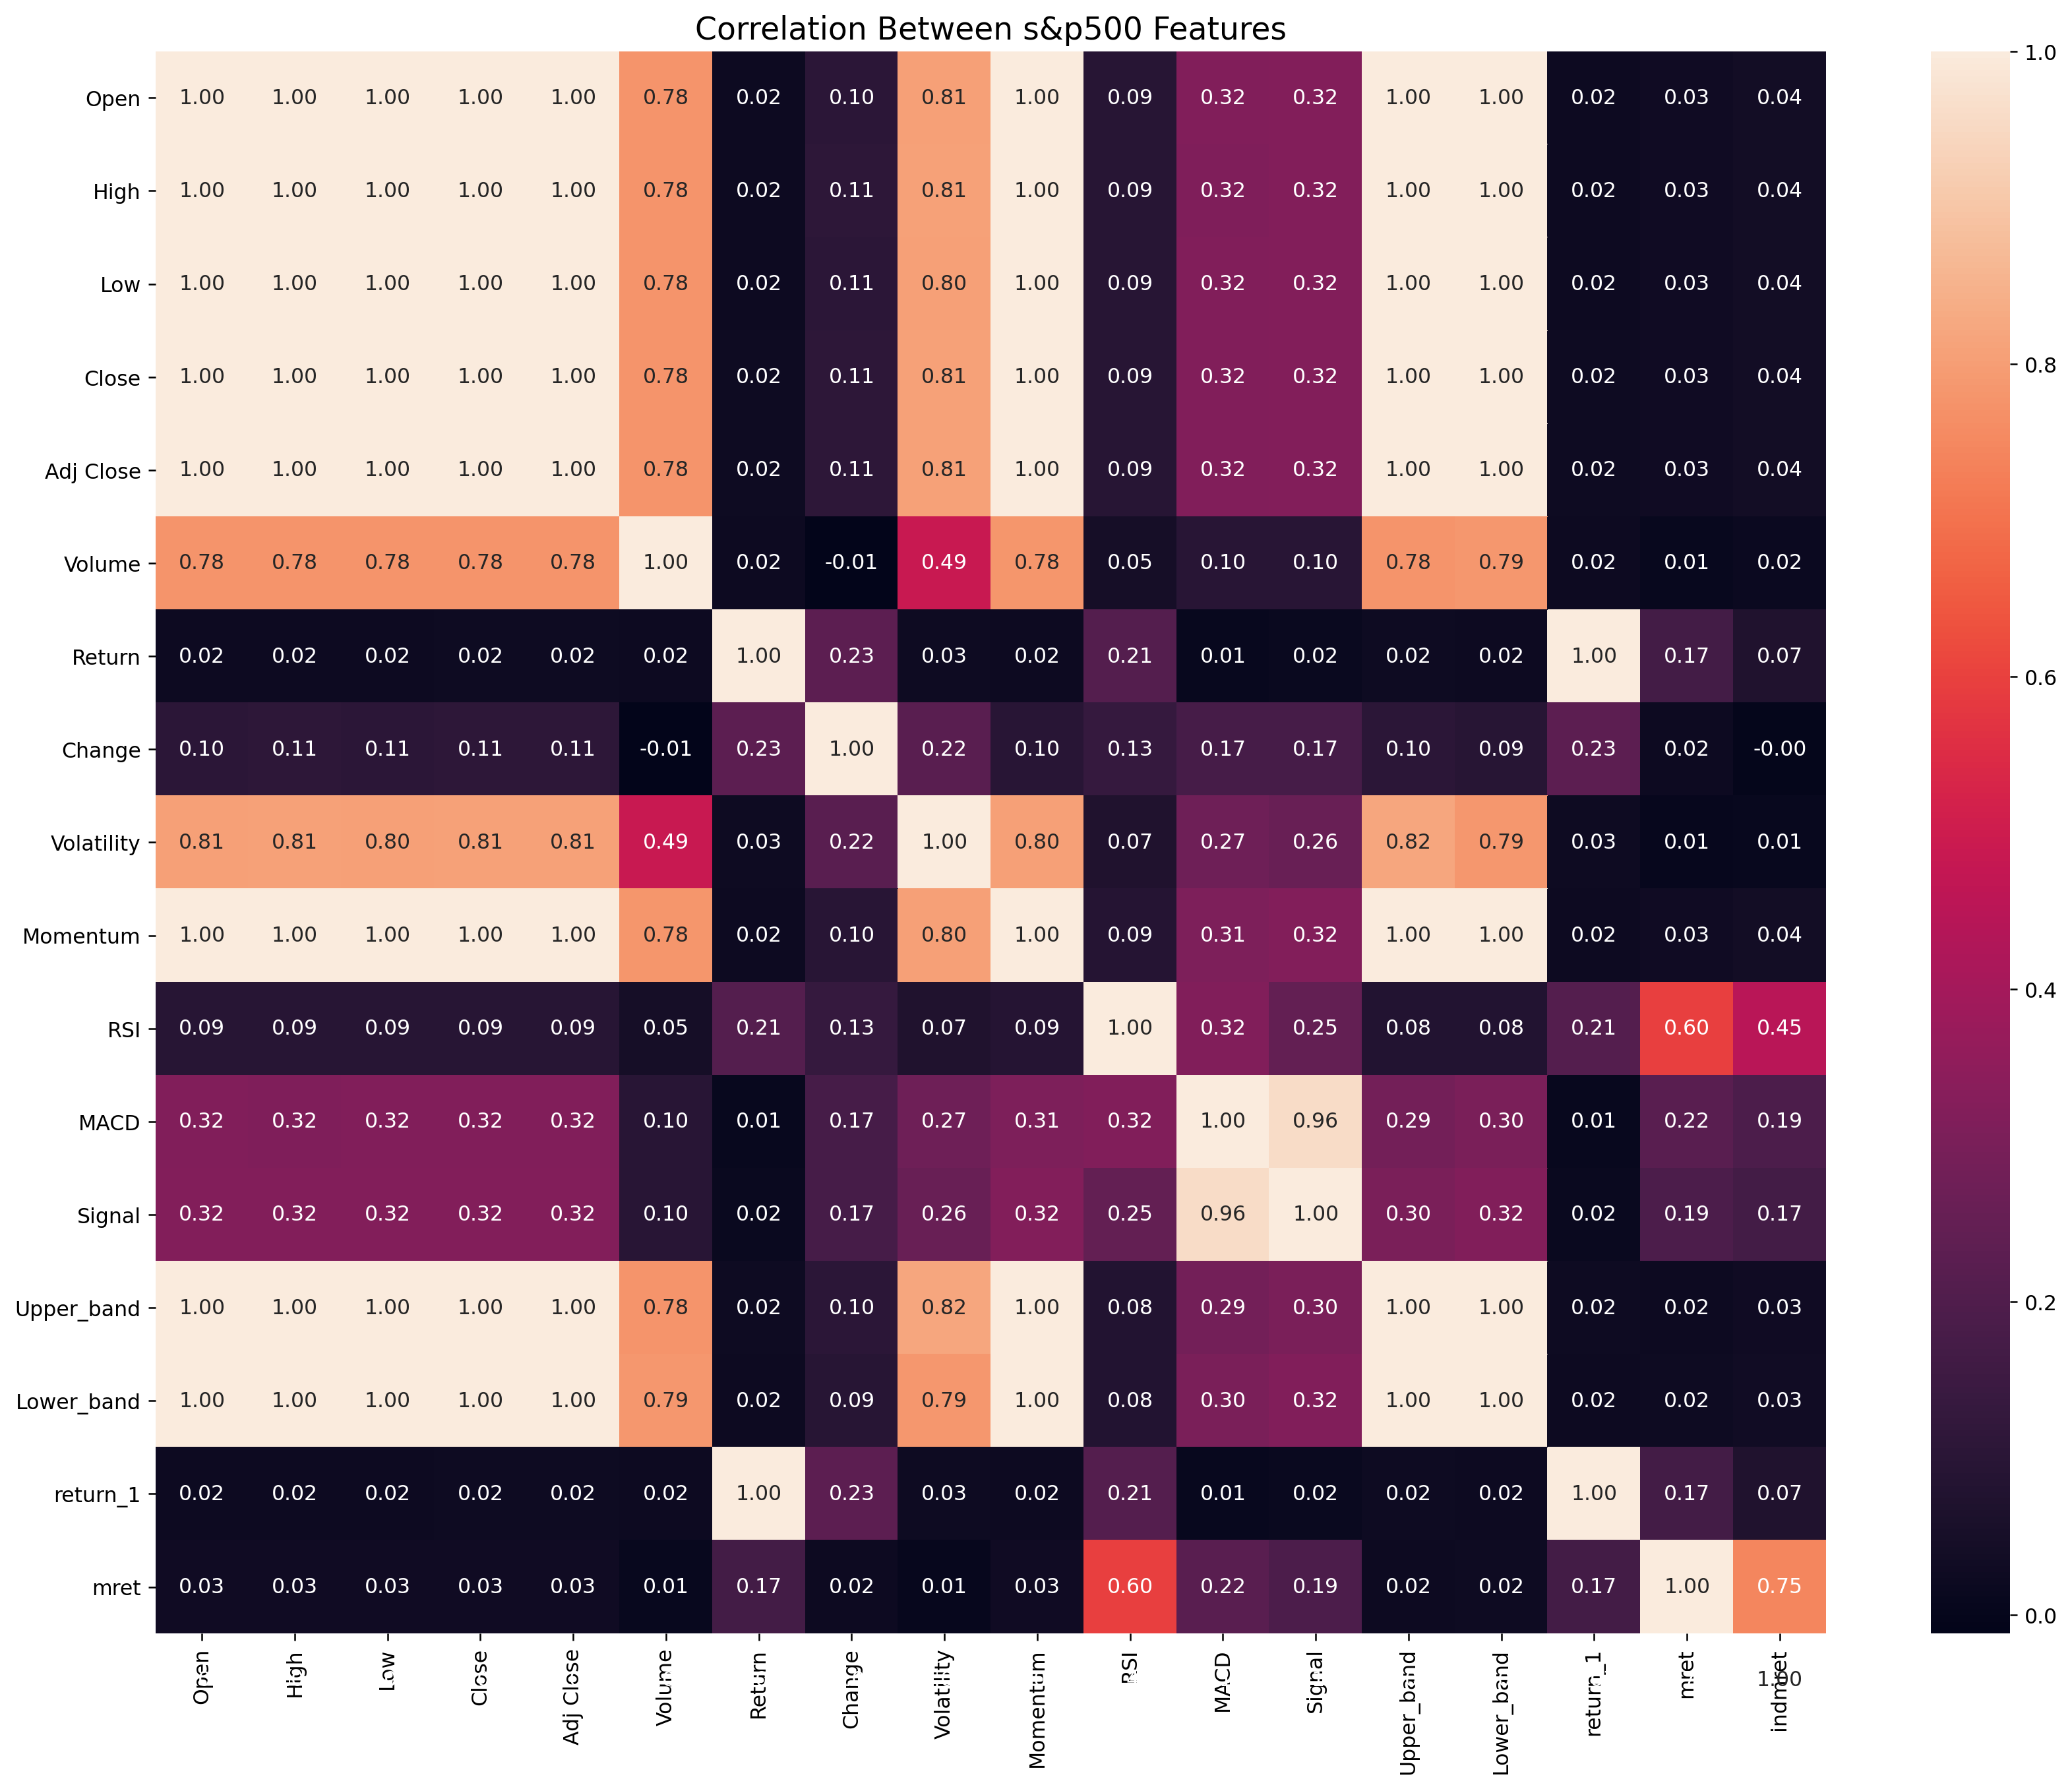

In [106]:
plt.rcParams['figure.dpi'] = 227
plt.figure(figsize=(18,14))
sns.heatmap(indm.corr(), annot=True, fmt='.2f')
plt.ylim(17, 0)
plt.title('Correlation Between s&p500 Features', fontSize=15)
plt.show()

In [107]:
indm.Industry.value_counts()

Finance              768
Aviation             720
Pharma_Healthcare    720
Technology           600
Index                120
Name: Industry, dtype: int64

<AxesSubplot:xlabel='Industry'>

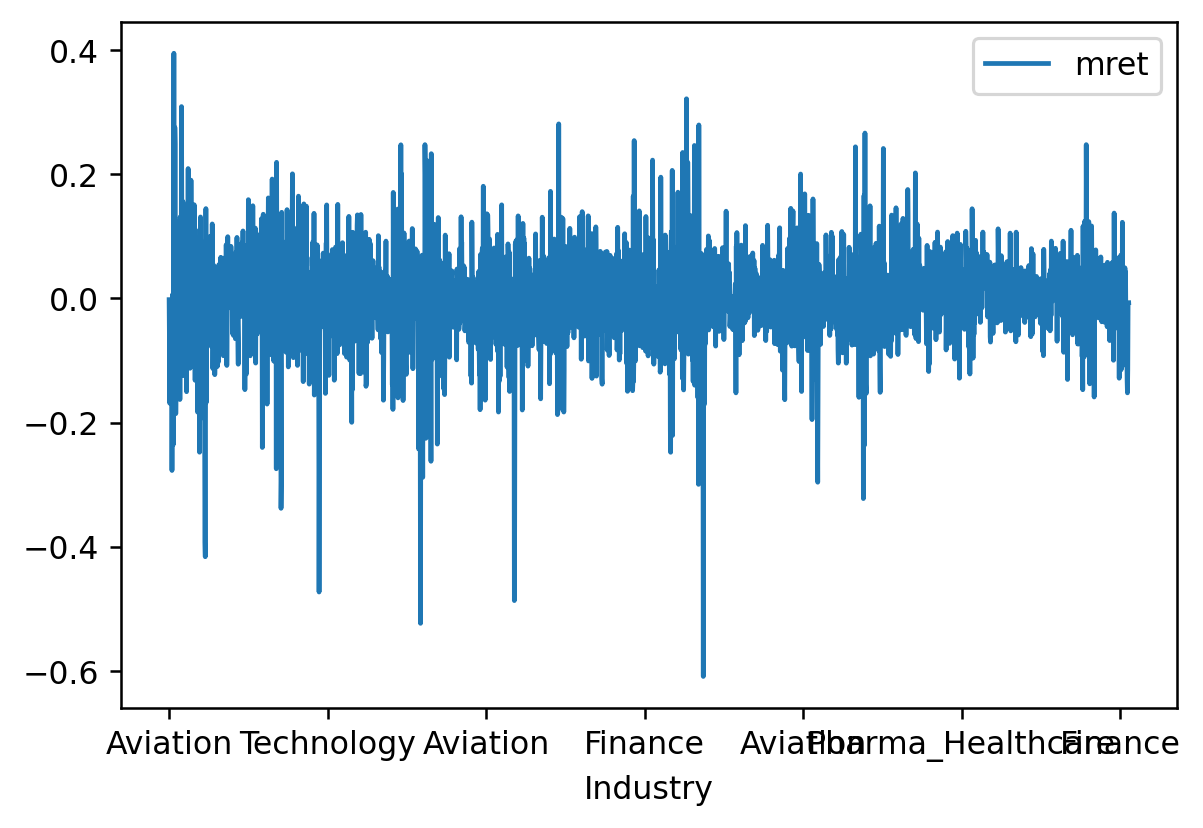

In [108]:
indm.plot(x="Industry",y="mret")

In [109]:
indm.head()
indm = indm.dropna()

In [110]:
ind2 = indm.sort_values(by="indmret",ascending=False).head(496)

<AxesSubplot:xlabel='Industry', ylabel='indmret'>

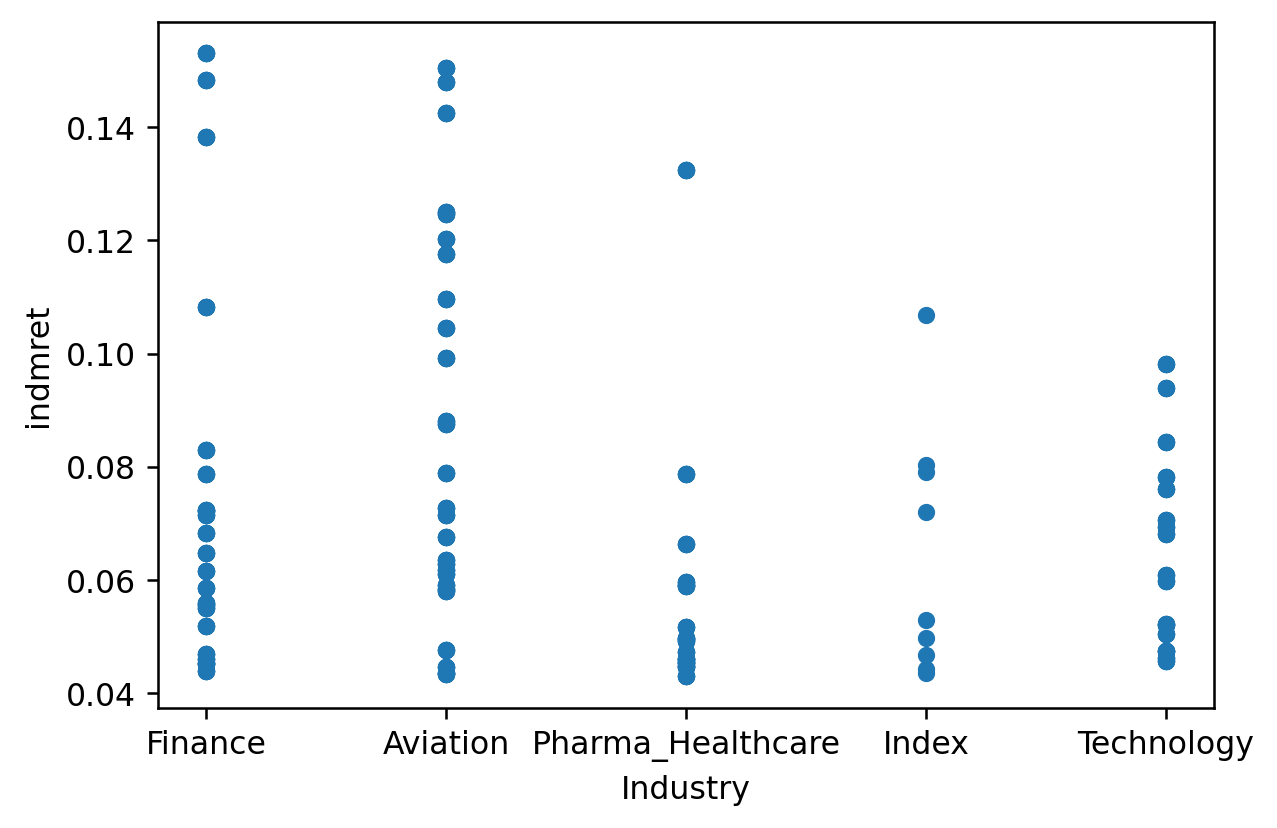

In [111]:
ind2.plot(x="Industry",y="indmret",kind="scatter",rot=0,fontsize=10)

In [112]:
## from above plot it is evident that the some industries provides good results , But we have to look at particular stocks as the above is misleading

In [113]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go
import plotly.express as px

In [114]:
trace1 = go.Bar(
    x = indm['Industry'],
    y = indm['mret'],
    name = 'Ticker YTD')
    
data = [trace1]

layout = go.Layout(title = 'YTD Return vs S&P 500 YTD'
    , barmode = 'group'
    , yaxis=dict(title='Returns')
    , xaxis=dict(title='Ticker')
    , legend=dict(x=.8,y=1)
    )

In [115]:
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [116]:
race1 = go.Bar(
    x = indm['Symbol'],
    y = indm['mret'],
    name = 'Ticker YTD')
    
data = [race1]

layout = go.Layout(title = 'YTD Return vs S&P 500 YTD'
    , barmode = 'group'
    , yaxis=dict(title='Returns')
    , xaxis=dict(title='Ticker')
    , legend=dict(x=.8,y=1)
    )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [117]:
indm.head()

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume,Return,Change,...,MACD,Signal,Upper_band,Lower_band,Industry,mdate,ydate,return_1,mret,indmret
0,2010-10-29,AAL,11.81,11.97,11.47,11.79,11.114922,5499700,-0.002,-0.09,...,0.665686,0.463998,12.338226,8.099869,Aviation,2010-10,2010,0.998,-0.002000,-0.002833
21,2010-11-30,AAL,11.18,11.34,11.01,11.16,10.520993,3925200,-0.002,-0.12,...,0.180853,0.197457,12.089646,10.347497,Aviation,2010-11,2010,0.998,-0.070642,0.025729
43,2010-12-31,AAL,10.16,10.19,9.95,10.01,9.436843,2191900,-0.015,-0.12,...,-0.243166,-0.216225,11.297531,9.559611,Aviation,2010-12,2010,0.985,-0.168853,-0.066724
63,2011-01-31,AAL,10.19,10.53,9.89,9.92,9.351994,7896200,-0.026,-0.24,...,-0.099128,-0.064527,11.628390,9.553515,Aviation,2011-01,2011,0.974,-0.048747,-0.072120
82,2011-02-28,AAL,8.67,8.72,8.45,8.61,8.117004,6397300,-0.007,0.04,...,-0.420021,-0.287627,10.722149,8.407375,Aviation,2011-02,2011,0.993,-0.133082,-0.041330


In [118]:
## Above plot is monthly wise returns which is very inconclusive  so we have to better start with yearly data i.e yearly returns , etc wrt s& p 500 because investment long term yields good result

In [119]:
## AS ind is the main dataframe for analysis i AM STILL USING THAT 
ind.info()
id4 = ind
id4=ind
id5=ind

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63142 entries, 0 to 63141
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        63142 non-null  datetime64[ns]
 1   Symbol      63142 non-null  object        
 2   Open        63142 non-null  float64       
 3   High        63142 non-null  float64       
 4   Low         63142 non-null  float64       
 5   Close       63142 non-null  float64       
 6   Adj Close   63142 non-null  float64       
 7   Volume      63142 non-null  int64         
 8   Return      63142 non-null  float64       
 9   Change      63142 non-null  float64       
 10  Volatility  63142 non-null  float64       
 11  Momentum    63142 non-null  float64       
 12  RSI         63142 non-null  float64       
 13  MACD        63142 non-null  float64       
 14  Signal      63142 non-null  float64       
 15  Upper_band  63142 non-null  float64       
 16  Lower_band  63142 non-

In [120]:
# groupby year and determine the daily percent change by year, and add it as a column to df
id4['pct_ch'] = id4.groupby(id4.Date.dt.year)['Adj Close'].apply(pd.Series.pct_change)

# groupby year and aggregate sum of pct_ch to get the yearly return
yearly_pct_ch = id4.groupby(id4.Date.dt.year)['pct_ch'].sum().mul(100).reset_index()
id4.rename(columns={'pct_ch':'cum_pct_ch_year'},inplace=True)

In [121]:
id4 = id4.drop_duplicates(subset = ['Symbol','ydate'],keep='last' )
id4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 43 to 63141
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             273 non-null    datetime64[ns]
 1   Symbol           273 non-null    object        
 2   Open             273 non-null    float64       
 3   High             273 non-null    float64       
 4   Low              273 non-null    float64       
 5   Close            273 non-null    float64       
 6   Adj Close        273 non-null    float64       
 7   Volume           273 non-null    int64         
 8   Return           273 non-null    float64       
 9   Change           273 non-null    float64       
 10  Volatility       273 non-null    float64       
 11  Momentum         273 non-null    float64       
 12  RSI              273 non-null    float64       
 13  MACD             273 non-null    float64       
 14  Signal           273 non-null    float6

In [122]:
id5 = id5.drop_duplicates(subset = ['Industry','ydate'],keep='last' )
id5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 25668 to 63141
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             64 non-null     datetime64[ns]
 1   Symbol           64 non-null     object        
 2   Open             64 non-null     float64       
 3   High             64 non-null     float64       
 4   Low              64 non-null     float64       
 5   Close            64 non-null     float64       
 6   Adj Close        64 non-null     float64       
 7   Volume           64 non-null     int64         
 8   Return           64 non-null     float64       
 9   Change           64 non-null     float64       
 10  Volatility       64 non-null     float64       
 11  Momentum         64 non-null     float64       
 12  RSI              64 non-null     float64       
 13  MACD             64 non-null     float64       
 14  Signal           64 non-null     floa

In [123]:
id4['Vf']=id4['Volatility'].multiply(0.01)
#id4['Vf']=id4['Volatility']

In [124]:
id5['Vf']=id5['Volatility'].multiply(0.01)

In [125]:
### lets try with yearly returns
trace1 = go.Bar(
    x = id4['Symbol'],
    y = id4['cum_pct_ch_year'],
    name = 'Ticker YTD')
trace2 = go.Scatter(
    x = id4['Symbol'],
    y = id4['Vf'],
    name = 'volatility')   
data = [trace1,trace2]

  
data = [trace1,trace2]

layout = go.Layout(title = 'Return vs S&P 500 YTD'
    , barmode = 'group'
    , yaxis=dict(title='Returns',tickformat='%')
    , xaxis=dict(title='Ticker')
    , legend=dict(x=.8,y=1)
    )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [126]:
## From above chart youi can see the returns of companies like AMZN,GOOGLE,DAL,IBM,BHC and index sp500 are good , so we are taking them into consideration

In [127]:
### lets try with yearly returns
trace1 = go.Bar(
    x = id5['Industry'],
    y = id5['cum_pct_ch_year'],
    name = 'Ticker YTD')
trace2 = go.Scatter(
    x = id5['Industry'],
    y = id5['Vf'],
    name = 'volatility')   
data = [trace1,trace2]

layout = go.Layout(title = 'YTD Return of industries and INDEX'
    , barmode = 'group'
    , yaxis=dict(title='Returns',tickformat=".1%")
    , xaxis=dict(title='Ticker')
    , legend=dict(x=.8,y=1)
    )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [136]:
chart_data_eval = id4

chart_data_eval.Symbol.value_counts()


AAL         11
HA          11
UNH         11
S&P500      11
RHHBY       11
PFE         11
MSFT        11
MS          11
MRK         11
LUV         11
JNJ         11
IBM         11
GS          11
AAPL        11
GOOGLE      11
DB          11
DAL         11
CS          11
BHC         11
BCS         11
AMZN        11
ALK         11
ALGT        11
WFC         11
FACEBOOK     9
Name: Symbol, dtype: int64

In [129]:
chart_data_eval_pivot_relative_relative = pd.pivot_table(chart_data_eval, index='Date', columns='Symbol', values = 'Close')

chart_data_eval_pivot.reset_index(inplace=True)

chart_data_eval_pivot.head()

Symbol,Date,AAL,AAPL,ALGT,ALK,AMZN,BCS,BHC,CS,DAL,...,JNJ,LUV,MRK,MS,MSFT,PFE,RHHBY,S&P500,UNH,WFC
0,2010-12-31,10.010000,11.520000,49.240002,14.172500,180.000000,15.225806,28.290001,39.462891,12.600000,...,61.849998,12.98,36.040001,27.209999,27.910000,17.510000,18.325001,1257.640015,36.110001,30.990000
1,2011-12-30,5.070000,14.464286,53.340000,18.772499,173.100006,10.129032,46.689999,22.929688,8.090000,...,65.580002,8.56,37.700001,15.130000,25.959999,21.639999,21.275000,1257.599976,50.680000,27.559999
2,2012-12-31,13.500000,19.006071,73.410004,21.545000,250.869995,15.963134,59.770000,23.984375,11.870000,...,70.099998,10.24,40.939999,19.120001,26.709999,25.080000,25.250000,1426.189941,54.240002,34.180000
3,2013-12-31,25.250000,20.036428,105.440002,36.685001,398.790009,18.129999,117.400002,31.040001,27.469999,...,91.589996,18.84,50.049999,31.360001,37.410000,30.629999,35.099998,1848.359985,75.300003,45.400002
4,2014-12-31,53.630001,27.594999,150.330002,59.759998,310.350006,15.010000,143.110001,25.080000,49.189999,...,104.570000,42.32,56.790001,38.799999,46.450001,31.150000,33.990002,2058.899902,101.089996,54.820000


In [141]:
trace1 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['S&P500'],
    mode = 'lines',
    name = 'SP Prices')

trace2 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['AAL'],
    mode = 'lines',
    name = 'AAL Returns')

trace3 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['AAPL'],
    mode = 'lines',
    name = 'AAPL Returns')

trace4 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['ALGT'],
    mode = 'lines',
    name = 'ALGT Returns')

trace5 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['ALK'],
    mode = 'lines',
    name = 'ALK Returns')

trace6 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['AMZN'],
    mode = 'lines',
    name = 'AMZN Returns')

trace7 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['BCS'],
    mode = 'lines',
    name = 'BCS Returns')

trace8 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['BHC'],
    mode = 'lines',
    name = 'BHC Returns')

trace9 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['CS'],
    mode = 'lines',
    name = 'CS Returns')

trace10 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['DAL'],
    mode = 'lines',
    name = 'DAL Returns')

trace11 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['DB'],
    mode = 'lines',
    name = 'DB Returns')

trace12 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['FACEBOOK'],
    mode = 'lines',
    name = 'FB Returns')

trace13 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['GOOGLE'],
    mode = 'lines',
    name = 'GOOG Returns')

trace14 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['GS'],
    mode = 'lines',
    name = 'GS Returns')

trace15 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['HA'],
    mode = 'lines',
    name = 'HA Returns')

trace16 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['IBM'],
    mode = 'lines',
    name = 'IBM Returns')  

trace17 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['JNJ'],
    mode = 'lines',
    name = 'JNJ Returns')

trace18 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['LUV'],
    mode = 'lines',
    name = 'LUV Returns')

trace19 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['MRK'],
    mode = 'lines',
    name = 'MRK Returns')    

trace20 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['MS'],
    mode = 'lines',
    name = 'MS Returns')

trace21 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['MSFT'],
    mode = 'lines',
    name = 'MSFT Returns')

trace22 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['PFE'],
    mode = 'lines',
    name = 'PFE Returns')        

trace23 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['RHHBY'],
    mode = 'lines',
    name = 'RHHBY Returns')

trace24 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['UNH'],
    mode = 'lines',
    name = 'UNH Returns')

trace25 = go.Scatter(
    x = chart_data_eval_pivot['Date'],
    y = chart_data_eval_pivot['WFC'],
    mode = 'lines',
    name = 'WFC Returns')    


In [142]:
data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12, trace13, trace14, trace15, trace16, trace17, trace18, trace19, trace20, trace21, trace22, trace23, trace24, trace25]

layout = go.Layout(title = 'Share Price Returns by Ticker'
    , barmode = 'group'
    , yaxis=dict(title='Returns')
    , xaxis=dict(title='Ticker')
    , legend=dict(x=1,y=1)
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

## By above comparision in Pivot table the companies have high closing point are amzn,goog,unh,fb,msft,gs,jnj in decreasing order of close but another factor which is important is relative return comparisin wrt index

## Relative return : It is a measure of the return of an investment portfolio relative to a theoretical passive reference portfolio or benchmark. In active portfolio management, the aim is to maximize the relative return. 

In [143]:
chart_data_eval_pivot_relative = pd.pivot_table(id4, index='Date', columns='Symbol', values = 'Close')

chart_data_eval_pivot_relative.tail()

Symbol,AAL,AAPL,ALGT,ALK,AMZN,BCS,BHC,CS,DAL,DB,...,JNJ,LUV,MRK,MS,MSFT,PFE,RHHBY,S&P500,UNH,WFC
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-30,46.689999,28.955000,166.399994,88.730003,749.869995,11.00,14.520000,14.31,49.189999,18.100000,...,115.209999,49.840000,58.869999,42.250000,62.139999,32.480000,28.530001,2238.830078,160.039993,55.110001
2017-12-29,52.029999,42.307499,154.750000,73.510002,1169.469971,10.90,20.780001,17.85,56.000000,19.030001,...,139.720001,65.449997,56.270000,52.470001,85.540001,36.220001,31.580000,2673.610107,220.460007,60.669998
2018-12-31,32.110001,39.435001,100.220001,60.849998,1501.969971,7.54,18.469999,10.86,49.900002,8.150000,...,129.050003,46.480000,76.410004,39.650002,101.570000,43.650002,31.080000,2506.850098,249.119995,46.080002
2019-12-31,28.680000,73.412498,174.039993,67.750000,1847.839966,9.52,29.920000,13.45,58.480000,7.780000,...,145.869995,53.980000,90.949997,51.119999,157.699997,39.180000,40.660000,3230.780029,293.980011,53.799999
2020-09-30,12.290000,115.809998,119.800003,36.630001,3148.729980,5.01,15.540000,9.97,30.580000,8.400000,...,148.880005,37.500000,82.949997,48.349998,210.330002,36.700001,42.810001,3363.000000,311.769989,23.510000


In [144]:
chart_data_eval_pivot_relative_first = chart_data_eval_pivot_relative.iloc[0,:]

chart_data_eval_pivot_relative_first.head()

Symbol
AAL      10.010000
AAPL     11.520000
ALGT     49.240002
ALK      14.172500
AMZN    180.000000
Name: 2010-12-31 00:00:00, dtype: float64

In [145]:
chart_data_eval_pivot_relative = (chart_data_eval_pivot_relative.divide(chart_data_eval_pivot_relative_first, axis=1))-1

chart_data_eval_pivot_relative.reset_index(inplace=True)

chart_data_eval_pivot_relative.head()

Symbol,Date,AAL,AAPL,ALGT,ALK,AMZN,BCS,BHC,CS,DAL,...,JNJ,LUV,MRK,MS,MSFT,PFE,RHHBY,S&P500,UNH,WFC
0,2010-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2011-12-30,-0.493506,0.255580,0.083266,0.324572,-0.038333,-0.334746,0.650406,-0.418956,-0.357937,...,0.060307,-0.340524,0.046060,-0.443954,-0.069867,0.235865,0.160982,-0.000032,0.403489,-0.110681
2,2012-12-31,0.348651,0.649833,0.490861,0.520198,0.393722,0.048426,1.112761,-0.392230,-0.057937,...,0.133387,-0.211094,0.135960,-0.297317,-0.042995,0.432324,0.377899,0.134021,0.502077,0.102936
3,2013-12-31,1.522478,0.739273,1.141348,1.588464,1.215500,0.190741,3.149876,-0.213438,1.180159,...,0.480841,0.451464,0.388735,0.152518,0.340380,0.749286,0.915416,0.469705,1.085295,0.464989
4,2014-12-31,4.357642,1.395399,2.053006,3.216617,0.724167,-0.014174,4.058678,-0.364466,2.903968,...,0.690703,2.260401,0.575749,0.425946,0.664278,0.778983,0.854843,0.637114,1.799501,0.768958


In [146]:
chart_data_eval_pivot_relative.tail()

Symbol,Date,AAL,AAPL,ALGT,ALK,AMZN,BCS,BHC,CS,DAL,...,JNJ,LUV,MRK,MS,MSFT,PFE,RHHBY,S&P500,UNH,WFC
6,2016-12-30,3.664336,1.513455,2.379366,5.260716,3.165944,-0.277542,-0.486744,-0.637381,2.903968,...,0.862732,2.839753,0.633463,0.552738,1.226442,0.854940,0.556889,0.780184,3.432013,0.778316
7,2017-12-29,4.197802,2.672526,2.142770,4.186806,5.497055,-0.284110,-0.265465,-0.547676,3.444444,...,1.259014,4.042373,0.561321,0.928335,2.064851,1.068532,0.723329,1.125895,5.105234,0.957728
8,2018-12-31,2.207792,2.423177,1.035337,3.293526,7.344278,-0.504788,-0.347119,-0.724805,2.960318,...,1.086500,2.580894,1.120144,0.457185,2.639197,1.492861,0.696044,0.993297,5.898920,0.486931
9,2019-12-31,1.865135,5.372613,2.534524,3.780385,9.265778,-0.374746,0.057617,-0.659173,3.641270,...,1.358448,3.158706,1.523585,0.878721,4.650304,1.237579,1.218827,1.568923,7.141235,0.736044
10,2020-09-30,0.227772,9.052951,1.432981,1.584583,16.492944,-0.670953,-0.450689,-0.747358,1.426984,...,1.407114,1.889060,1.301609,0.776920,6.536009,1.095945,1.336153,1.674056,7.633896,-0.241368


In [147]:
trace1 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['S&P500'],
    mode = 'lines',
    name = 'SP Prices')

trace2 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['AAL'],
    mode = 'lines',
    name = 'AAL Returns')

trace3 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['AAPL'],
    mode = 'lines',
    name = 'AAPL Returns')

trace4 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['ALGT'],
    mode = 'lines',
    name = 'ALGT Returns')

trace5 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['ALK'],
    mode = 'lines',
    name = 'ALK Returns')

trace6 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['AMZN'],
    mode = 'lines',
    name = 'AMZN Returns')

trace7 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['BCS'],
    mode = 'lines',
    name = 'BCS Returns')

trace8 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['BHC'],
    mode = 'lines',
    name = 'BHC Returns')

trace9 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['CS'],
    mode = 'lines',
    name = 'CS Returns')

trace10 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['DAL'],
    mode = 'lines',
    name = 'DAL Returns')

trace11 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['DB'],
    mode = 'lines',
    name = 'DB Returns')

trace12 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['FACEBOOK'],
    mode = 'lines',
    name = 'FB Returns')

trace13 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['GOOGLE'],
    mode = 'lines',
    name = 'GOOG Returns')

trace14 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['GS'],
    mode = 'lines',
    name = 'GS Returns')

trace15 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['HA'],
    mode = 'lines',
    name = 'HA Returns')

trace16 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['IBM'],
    mode = 'lines',
    name = 'IBM Returns')  

trace17 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['JNJ'],
    mode = 'lines',
    name = 'JNJ Returns')

trace18 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['LUV'],
    mode = 'lines',
    name = 'LUV Returns')

trace19 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['MRK'],
    mode = 'lines',
    name = 'MRK Returns')    

trace20 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['MS'],
    mode = 'lines',
    name = 'MS Returns')

trace21 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['MSFT'],
    mode = 'lines',
    name = 'MSFT Returns')

trace22 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['PFE'],
    mode = 'lines',
    name = 'PFE Returns')        

trace23 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['RHHBY'],
    mode = 'lines',
    name = 'RHHBY Returns')

trace24 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['UNH'],
    mode = 'lines',
    name = 'UNH Returns')

trace25 = go.Scatter(
    x = chart_data_eval_pivot_relative['Date'],
    y = chart_data_eval_pivot_relative['WFC'],
    mode = 'lines',
    name = 'WFC Returns')    


In [151]:
data1 = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12, trace13, trace14, trace15, trace16, trace17, trace18, trace19, trace20, trace21, trace22, trace23, trace24, trace25]

layout = go.Layout(title = 'Return Comparisons by Ticker'
    , barmode = 'group'
    , yaxis=dict(title='Relative Returns', tickformat=".1%")
    , xaxis=dict(title='Ticker')
    , legend=dict(x=1,y=1)
    )

fig = go.Figure(data=data1, layout=layout)
iplot(fig)

## So by above data and considering volatility for patrick iyengar we have AAPL,UNH,MSFT,GS,LUV

## So by above data and considering volatility for peter iyengar we have AMZN,AAPL,UNH,MSFT,GOOG

## we construct the sample excel file with above tickers for individual and obtain the result and analysis will be done simultaneously